In [64]:
import requests
import random
from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [65]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '4e6def2863544dd68e99c8f13f68d246' }).json()
        return json[result_key]
    except:
        print(json)
        return None

Get teams for Champions League 2016/17:

In [66]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/440/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/729/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/729/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/729'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/commons/c/c5/FC_Basel.png',
  'name': 'FC Basel',
  'shortName': 'Basel',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/753/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/753/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/753'}},
  'code': 'LUD',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/commons/8/87/Ludogorets_FC.png',
  'name': 'Ludogorez Rasgrad',
  'shortName': 'Ludogorez',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/5/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/5/players'},
   'self'

Now build dictionary for teams with data: name, cost, goals. Text output used to validate parsed data.

Max random cost value is Real Madrid's cost (I assume it is the most expensive one)

In [67]:
for team in teams:
    sleep(5)  # 50 requests per minute are available only, so have to sleep

    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')

    games = len(fixtures)
    loses = 0

    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            loses += 1 if int(f['result']['goalsHomeTeam']) < int(f['result']['goalsAwayTeam']) else 0
        else:
            loses += 1 if int(f['result']['goalsAwayTeam']) < int(f['result']['goalsHomeTeam']) else 0

    market_value = team['squadMarketValue']
    if market_value is None:
        market_value = random.randint(1576, 3690) * (10 ** 6)  # generate random cost

    print('Team "{}" costs {}, played {} games, had {} loses'.format(team['name'], market_value, games, loses))

    team['players'] = players
    team['cost'] = market_value
    team['loses'] = loses

Team "FC Basel" costs 2281000000, played 8 games, had 3 loses
Team "Ludogorez Rasgrad" costs 1854000000, played 1 games, had 1 loses
Team "FC Bayern München" costs 2517000000, played 52 games, had 7 loses
Team "FC Rostov" costs 3665000000, played 0 games, had 0 loses
Team "PSV Eindhoven" costs 2847000000, played 34 games, had 3 loses
Team "Club Atlético de Madrid" costs 2741000000, played 44 games, had 6 loses
Team "FC Barcelona" costs 1674000000, played 48 games, had 2 loses
Team "Celtic FC" costs 2250000000, played 10 games, had 6 loses
Team "Dynamo Kyiv" costs 1949000000, played 0 games, had 0 loses
Team "SSC Napoli" costs 2886000000, played 46 games, had 7 loses
Team "SL Benfica" costs 1753000000, played 40 games, had 9 loses
Team "Besiktas JK" costs 2282000000, played 8 games, had 2 loses
Team "Paris Saint-Germain" costs 2876000000, played 46 games, had 6 loses
Team "Arsenal FC" costs 3221000000, played 38 games, had 13 loses
Team "Legia Warszawa" costs 2793000000, played 2 games,

In [68]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'cost': team['cost'], 'loses': team['loses']})
team_for_pd

[{'cost': 2281000000, 'loses': 3, 'name': 'FC Basel'},
 {'cost': 1854000000, 'loses': 1, 'name': 'Ludogorez Rasgrad'},
 {'cost': 2517000000, 'loses': 7, 'name': 'FC Bayern München'},
 {'cost': 3665000000, 'loses': 0, 'name': 'FC Rostov'},
 {'cost': 2847000000, 'loses': 3, 'name': 'PSV Eindhoven'},
 {'cost': 2741000000, 'loses': 6, 'name': 'Club Atlético de Madrid'},
 {'cost': 1674000000, 'loses': 2, 'name': 'FC Barcelona'},
 {'cost': 2250000000, 'loses': 6, 'name': 'Celtic FC'},
 {'cost': 1949000000, 'loses': 0, 'name': 'Dynamo Kyiv'},
 {'cost': 2886000000, 'loses': 7, 'name': 'SSC Napoli'},
 {'cost': 1753000000, 'loses': 9, 'name': 'SL Benfica'},
 {'cost': 2282000000, 'loses': 2, 'name': 'Besiktas JK'},
 {'cost': 2876000000, 'loses': 6, 'name': 'Paris Saint-Germain'},
 {'cost': 3221000000, 'loses': 13, 'name': 'Arsenal FC'},
 {'cost': 2793000000, 'loses': 1, 'name': 'Legia Warszawa'},
 {'cost': 1755000000, 'loses': 14, 'name': 'Borussia Dortmund'},
 {'cost': 3537000000, 'loses': 6, 'n

Create dataframe and remove useless columns (i.e. name).

Unfortunately, all costs are random so nothing to predict using the df and graphs below :(

In [83]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,cost,loses,name
0,2281000000,3,FC Basel
1,1854000000,1,Ludogorez Rasgrad
2,2517000000,7,FC Bayern München
3,3665000000,0,FC Rostov
4,2847000000,3,PSV Eindhoven
5,2741000000,6,Club Atlético de Madrid
6,1674000000,2,FC Barcelona
7,2250000000,6,Celtic FC
8,1949000000,0,Dynamo Kyiv
9,2886000000,7,SSC Napoli


In [84]:
del teams_pd['name']
teams_pd

,cost,loses
0,2281000000,3
1,1854000000,1
2,2517000000,7
3,3665000000,0
4,2847000000,3
5,2741000000,6
6,1674000000,2
7,2250000000,6
8,1949000000,0
9,2886000000,7


Build basic scatter

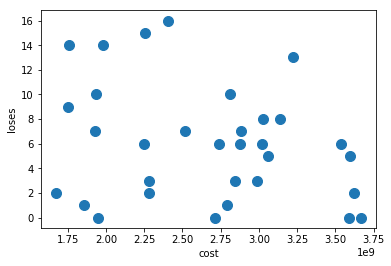

In [85]:
teams_pd.plot.scatter(x='cost', y='loses', s=100)

Prepare data for clustering

In [72]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[3.77014156, 0.65044771],
       [3.06437635, 0.2168159 ],
       [4.1602132 , 1.51771132],
       [6.05768032, 0.        ],
       [4.70565235, 0.65044771],
       [4.53045068, 1.30089541],
       [2.76686408, 0.4336318 ],
       [3.71890333, 1.30089541],
       [3.22139671, 0.        ],
       [4.77011334, 1.51771132],
       [2.89743891, 1.95134312],
       [3.7717944 , 0.4336318 ],
       [4.75358488, 1.30089541],
       [5.32381673, 2.81860673],
       [4.61639867, 0.2168159 ],
       [2.9007446 , 3.03542263],
       [5.84611604, 1.30089541],
       [5.93702257, 0.        ],
       [5.94859249, 1.08407951],
       [3.97840015, 3.46905444],
       [5.06101423, 1.08407951],
       [5.98660795, 0.4336318 ],
       [4.48086531, 0.        ],
       [3.72386187, 3.25223854],
       [4.99820608, 1.73452722],
       [3.18668695, 1.51771132],
       [3.20156256, 2.16815902],
       [4.94366217, 0.65044771],
       [4.98994185, 1.30089541],
       [3.26932924, 3.03542263],
       [5.

Three clusters (teams by costs and loses)

In [77]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[3.30828918, 2.63276453],
        [3.67634255, 0.40652982],
        [5.16796308, 1.21161828]]),
 array([1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2,
        1, 0, 2, 0, 0, 2, 2, 0, 2, 2]))

In [78]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]

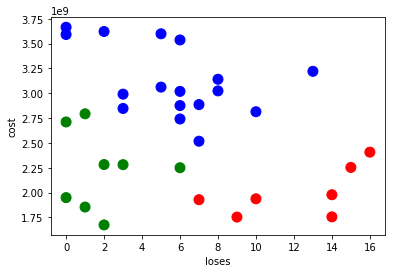

In [79]:
teams_pd.plot.scatter(x='loses', y='cost', c=colors, s=100)

Five clusters (teams by cost and loses)

In [80]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[3.43296099, 1.69116404],
        [5.35836121, 0.54203976],
        [3.46808397, 3.19803456],
        [4.90110138, 1.73452722],
        [3.31891462, 0.34690544]]),
 array([4, 4, 0, 1, 1, 3, 4, 0, 4, 3, 0, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 2, 3, 0, 0, 1, 3, 2, 3, 3]))

In [81]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

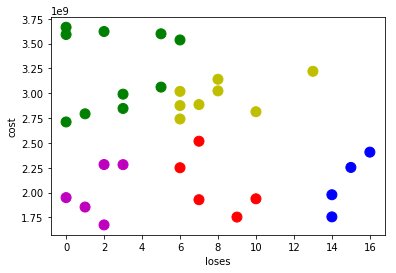

In [82]:
teams_pd.plot.scatter(x='loses', y='cost', c=colors, s=100)